# 📊 Customer Churn Prediction — Exploratory Data Analysis (EDA)

## Phase 1

This notebook explores the Telco Customer Churn dataset to understand customer behavior and identify key factors contributing to churn.

The insights from this analysis will guide feature engineering and model selection in later stages of the project.

In [10]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
#Load Dataset

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Dataset Overview

df.shape
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

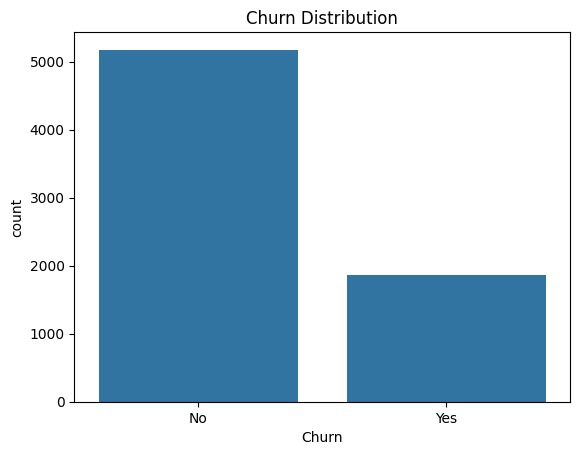

In [4]:
# Target Variable Distribution

df['Churn'].value_counts(normalize=True) * 100

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [5]:
# Missing Values Check

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Summary Statistics

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


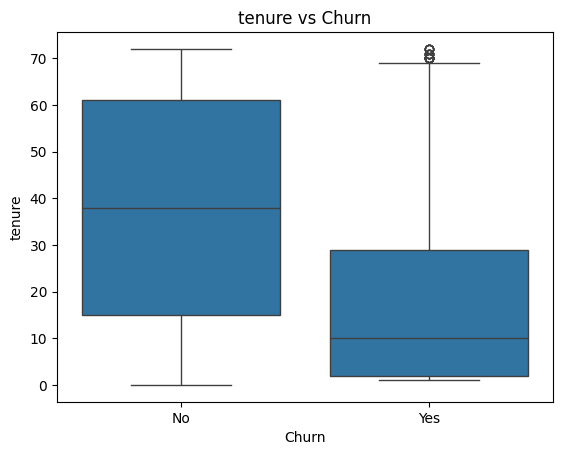

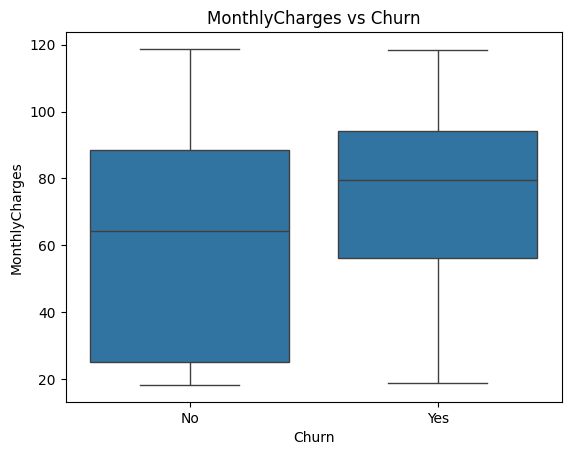

In [7]:
# Churn vs Numerical Features

numerical_cols = ['tenure', 'MonthlyCharges']

for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

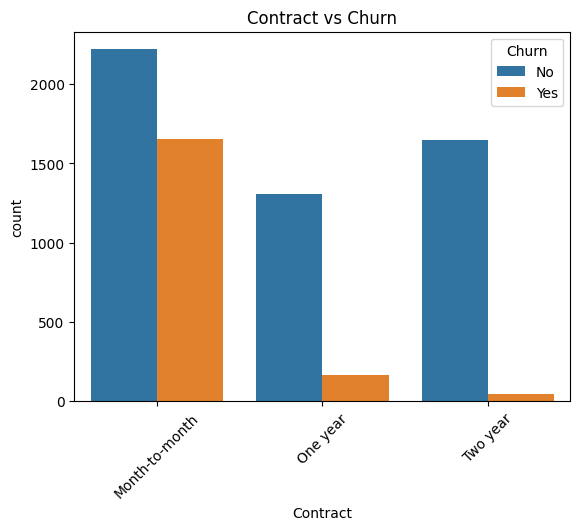

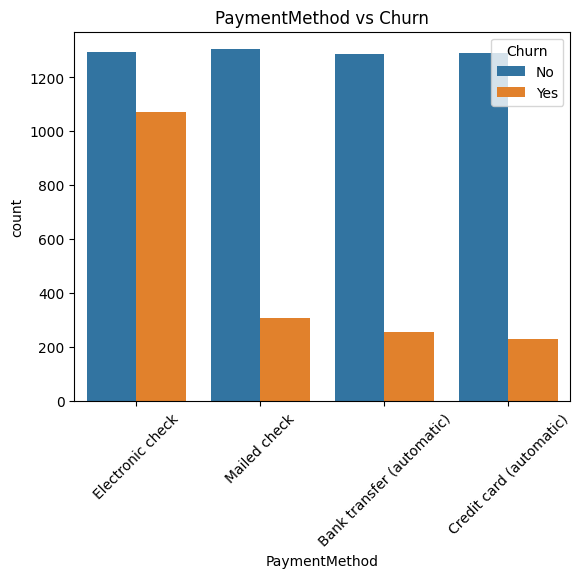

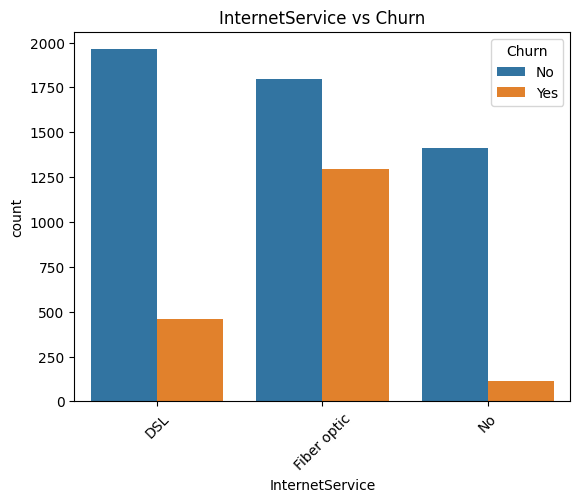

In [8]:
# Churn vs Categorical Features

categorical_cols = ['Contract', 'PaymentMethod', 'InternetService']

for col in categorical_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.show()

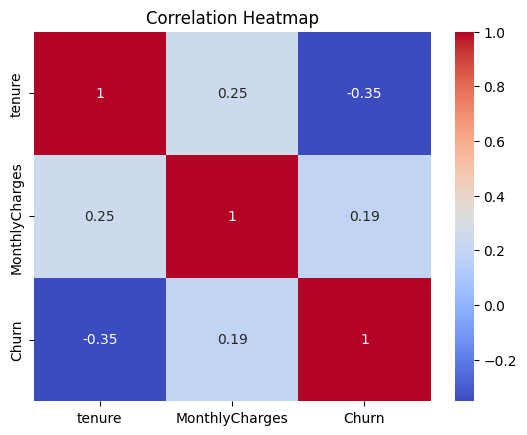

In [9]:
# Correlation Analysis

df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

corr = df_encoded[['tenure', 'MonthlyCharges', 'Churn']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 🔍 Key Insights from EDA

- Customers with shorter tenure are more likely to churn.
- Month-to-month contracts show higher churn rates.
- Higher monthly charges correlate with increased churn.
- Certain payment methods are associated with higher churn risk.

These insights will guide feature engineering and model selection.

## 📌 Summary & Next Steps

The exploratory analysis revealed several strong indicators of churn,
particularly related to contract type, tenure, and monthly charges.

In the next phase, the dataset will be cleaned, encoded, and transformed
into a model-ready format, followed by feature engineering.